In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter
import empymod
from sys import path
path.append("../python_codes/")
import ttem 
from ttem import get_ttem_waveform, ttem_forward_modelling
import matplotlib
plt.style.use('ggplot')
matplotlib.rcParams['font.size'] = 12

## Step1: Load tTEM current waveform



In [3]:
# Load tTEM waveform
ttem_waveform = get_ttem_waveform(t0='peak')
# times of the input currents - lm
time_input_currents_lm = ttem_waveform['time_input_currents_lm']
# amplitude of input currents -lm
input_currents_lm = ttem_waveform['input_currents_lm']
# measured time channels - lm
times_lm = ttem_waveform['times_lm']

# times of the input currents - hm
time_input_currents_hm = ttem_waveform['time_input_currents_hm']
# amplitude of input currents -hm
input_currents_hm = ttem_waveform['input_currents_hm']
# measured time channels - hm
times_hm = ttem_waveform['times_hm']

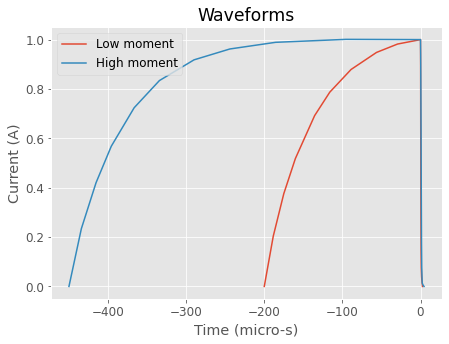

In [4]:
plt.figure(figsize=(7, 5))
plt.title('Waveforms')
plt.plot(time_input_currents_lm * 1e6, input_currents_lm, label='Low moment')
plt.plot(time_input_currents_hm * 1e6, input_currents_hm, label='High moment')
plt.xlabel('Time (micro-s)')
plt.ylabel('Current (A)')
# plt.xlim(-5, 5)
plt.legend()
plt.show()

## Step2: Forward model tTEM response 

In [5]:
# depth to the layer
z = 10
# thickness of the layer
h = 10
# background resistivity (mixed type)
rho_mixed = 20.
# resistivity of a clay layer
rho_clay = 8. # resistivity of 
# resistivity of a clay layer
rho_sand = 50

# calculate clay layer response
data_clay_lm, data_clay_hm = ttem_forward_modelling(
    ttem_waveform, depth=[z, z+h], res=[rho_mixed, rho_clay, rho_mixed]
)

# calculate sand layer response
data_sand_lm, data_sand_hm = ttem_forward_modelling(
    ttem_waveform, depth=[z, z+h], res=[rho_mixed, rho_sand, rho_mixed]
)

# calculate background (mixed) response
data_background_lm, data_background_hm = ttem_forward_modelling(
    ttem_waveform, depth=[z, z+h], res=[rho_mixed, rho_mixed, rho_mixed]
)

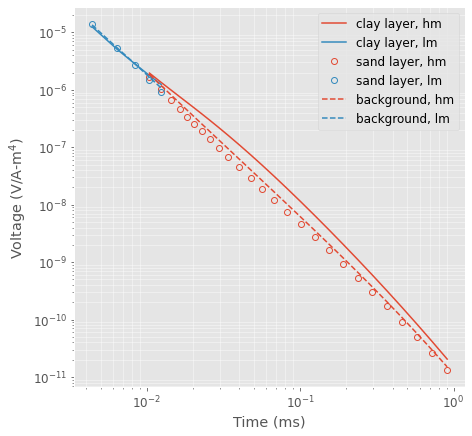

In [6]:
plt.figure(figsize=(7, 7))
plt.loglog(times_hm*1e3, data_clay_hm, label='clay layer, hm', color='C0')
plt.loglog(times_lm*1e3, data_clay_lm, label='clay layer, lm', color='C1')
plt.loglog(times_hm*1e3, data_sand_hm, label='sand layer, hm', color='C0', marker='o', markerfacecolor='None', linestyle='None')
plt.loglog(times_lm*1e3, data_sand_lm, label='sand layer, lm', color='C1', marker='o', markerfacecolor='None', linestyle='None')
plt.loglog(times_hm*1e3, data_background_hm, label='background, hm', color='C0', linestyle='--')
plt.loglog(times_lm*1e3, data_background_lm, label='background, lm', color='C1', linestyle='--')
plt.ylabel("Voltage (V/A-m$^4$)")
plt.grid(which='both', alpha=0.5)
plt.legend()
plt.xlabel('Time (ms)')
plt.show()

## Step 3: Calcluate detectability

Detectabilty is defined as 

$$ \text{detectability} (\%) = \sqrt{\frac{1}{N}\sum_{i=1}^{N} \Big(\frac{d^{i}_{layer}-d^{i}_{background}}{d^{i}_{background}}\Big)^2} \times 100 $$

where
- $d^{i}_{layer}$: layer response at i-th channel
- $d^{i}_{background}$: background response at i-th channel

In [7]:
# clay layer reponse 
d_clay_layer = np.r_[data_clay_lm, data_clay_hm]
# sand layer reponse 
d_sand_layer = np.r_[data_sand_lm, data_sand_hm]
# background reponse 
d_background = np.r_[data_background_lm, data_background_hm]

In [9]:
def calculate_detectiabiltiy(d_layer, d_background):
    # Need to fill in the function that can calculate detectaibliity for given 
    # d_layer and d_background 
    # return detectability
    pass

In [10]:
calculate_detectiabiltiy(d_clay_layer, d_background)

In [11]:
calculate_detectiabiltiy(d_sand_layer, d_background)

### Design a for loop to calculate a detectability with a variable z

In [13]:
# thickness of the layer
h = 10
z_values = np.linspace(1, 100)
detectability_values_clay = np.zeros_like(z_values)
for ii, z_tmp in enumerate(z_values):
    # need to fill in the for loop
    # detectability_values_clay[ii] = calculate_detectiabiltiy(??, d_background)
    pass

In [14]:
# thickness of the layer
h = 10
detectability_values_sand = np.zeros_like(z_values)
for ii, z_tmp in enumerate(z_values):
    # need to fill in the for loop
    # detectability_values_sand[ii] = calculate_detectiabiltiy(??, d_background)
    pass

### Plot detectability values as a function of depth, `z`

Text(0, 0.5, 'Detectability (%)')

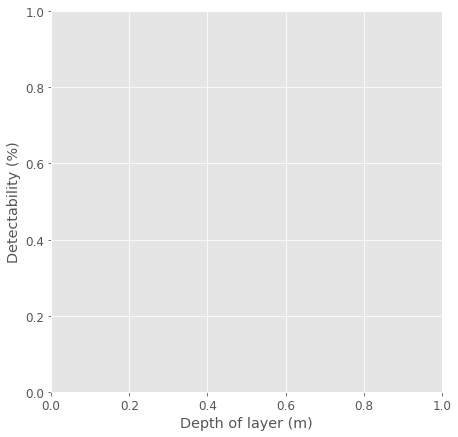

In [27]:
## Need to write a script for plotting
fig = plt.figure(figsize=(7,7))
plt.xlabel("Depth of layer (m)")
plt.ylabel("Detectability (%)")
# plt.legend()

## Step 4: Non-uniqueness

### 4-1 Equivalent conductance

In [28]:
## Need to write a for loop to calculate response and detectability with a variable thickness and resistivity of the layer. 

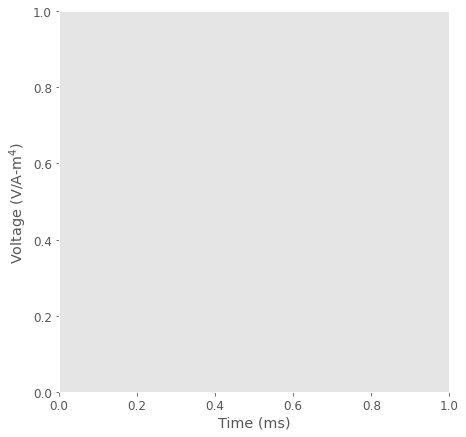

In [29]:
## Need to write a script for plotting 
plt.figure(figsize=(7, 7))
plt.ylabel("Voltage (V/A-m$^4$)")
plt.grid(which='both', alpha=0.5)
plt.xlabel('Time (ms)')
plt.show()    

### 3-2 Saturation of resistivity

In [30]:
## Need to write a for loop to calculate response and detectability with a variable resistivity of the layer. 

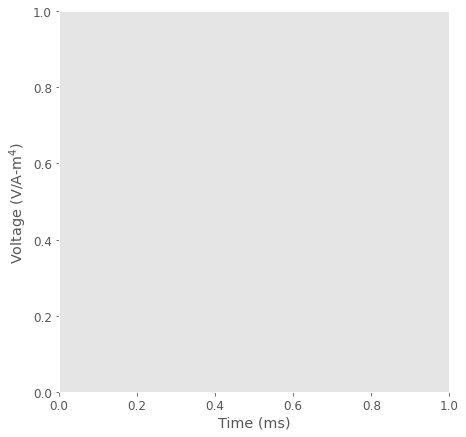

In [31]:
## Need to write a script for plotting 
plt.figure(figsize=(7, 7))
plt.ylabel("Voltage (V/A-m$^4$)")
plt.grid(which='both', alpha=0.5)
plt.xlabel('Time (ms)')
plt.show()    